In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pennylane as qml
import pennylane.numpy as pnp

In [5]:
PQC_params = [-0.22306392,  0.96833378,  1.9085548,  1.2089074,   0.92015667,  0.77409331,
 -0.6506603,   0.22301956,  1.91325895, -0.20817139,  1.56411373,  0.54160768,
 -1.32168944,  0.45814232,  0.06255112,  0.12734099]

operator_params = [-2.22039551,  1.99646609, -1.92925272,  3.44809977,  0.78566664]

params = np.array(PQC_params)
params_op = np.array(operator_params)

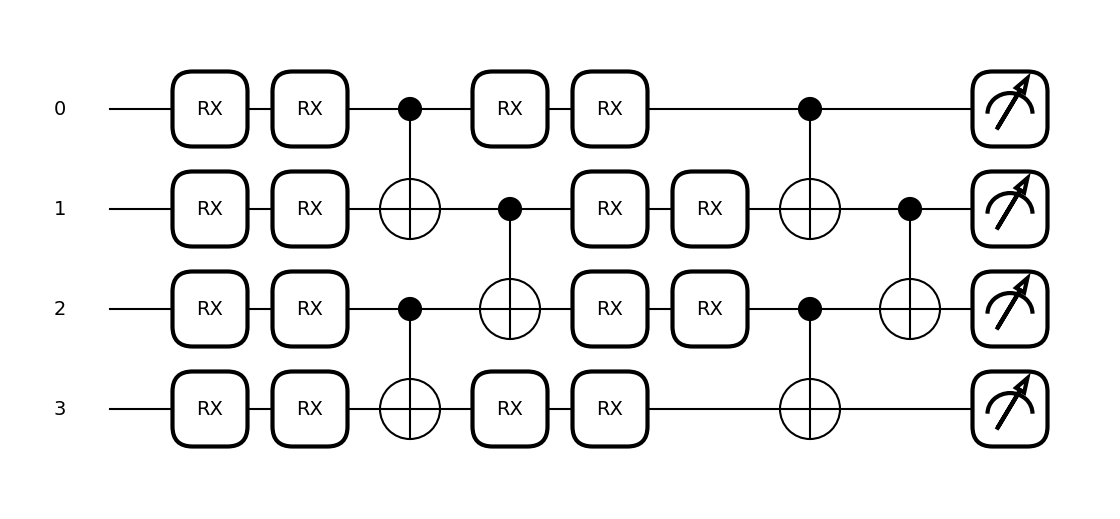

In [8]:
num_qubits = 4
device = qml.device("default.qubit", wires=num_qubits)


@qml.qnode(device)
def circuit(x,params,params_op):

    wires = list(range(num_qubits))
    ioff = 0
    for ilayer in range(2):
        for i in wires:
            qml.RX(params[ioff]*np.arccos(x[0]),wires=[i])
            ioff+=1
        for i in wires:
            qml.RX(params[ioff],wires=[i])
            ioff+=1

        qml.CNOT(wires=[0,1])
        qml.CNOT(wires=[2,3])
        qml.CNOT(wires=[1,2])


    #return qml.probs(wires=wires)
    return qml.expval(params_op[0]*qml.Identity(wires)+sum([params_op[i+1]*qml.PauliZ(i) for i in wires]))


fig, ax = qml.draw_mpl(circuit)([0],params,params_op)

plt.show()

In [10]:
qnn = lambda x: circuit(x,params,params_op)

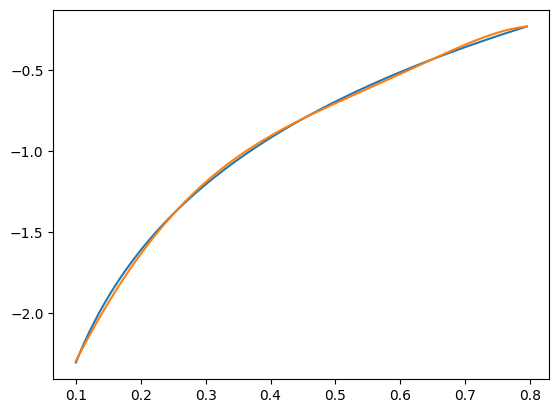

In [19]:
x = np.arange(0.1, 0.8, 0.005)
y = qnn([x])

plt.plot(x,np.log(x))
plt.plot(x,y)